CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [23]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston() #打開來會看到函式庫set好的資料
#這裡用pandas做資料處理,並加上欄位名稱
df = pd.DataFrame(boston["data"],
                  columns=boston["feature_names"])
#加上一欄"ans",把target欄位的值加進來
df["ans"] = boston["target"]
#存成csv,預設會有index,這邊不要
df.to_csv("boston.csv", encoding="utf-8", index=False)
#jupter支援比較漂亮的用法,要寫在最後一行,就會直接印出 >> 本地端還是要用print
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
# 開始丟到sklearn前, 把所有東西轉換成numpy array(好習慣)
import numpy as np
from sklearn.model_selection import train_test_split
# x: 輸入 y: 輸出
y = df["ans"]
y = np.array(y)
#這裡已經知道是boston["data"] , 但是用drop示範一次如何切資料 , axis參數:0是列,1是行
#所有的始丟到sklearn前, 把所有東西轉換成numpy array(好習慣)
import numpy as np
from sklearn.model_selection import train_test_split
# x: 輸入 y: 輸出
y = df["ans"]
y = np.array(y)
#這裡已經知道是boston["data"] , 但是用drop示範一次如何切資料 , axis參數:0是列,1是行
#所有的API做資料處理,都是產生新表格,原資料不會異動
x = df.drop(["ans"], axis=1) #axis沒有寫的話,預設是0
x = np.array(x)
#機器學習第一步：把資料分成兩份 >> 訓練資料&驗證資料 [大部分抓9:1] ,test_size參數是比例的意思
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
##使用train_test_split來做資料切割,會random切資料,但資料的index相對位置不會變動
# train_test_split([1, 2, 3, 4], 
#                  ["a", "b", "c", "d"],
#                  [101, 102, 103, 104],
#                  test_size=0.25)

In [25]:
#使用決策樹演算法,並且用分類
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5) #最後調參測試,發現=5的時候相對穩定&準確  
#用max_depth做前剪枝,這裡設定3層就可以達到100%,這裡的層數要看決策樹的狀況做分辨&調整
#前剪枝就算準確率下降也要做,可以提高穩定性(降低誤差值) >>> 不能過度學習極端的案例 ex:有特異種,超過一般規格,卻被模型學習進去
reg.fit(x_train, y_train) #把資料餵進去,x_train > 植物的數值 , y_train > 3種分類的結果

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(418.5, 713.475, 'RM <= 6.941\nmse = 86.103\nsamples = 455\nvalue = 22.327'),
 Text(209.25, 509.625, 'LSTAT <= 14.4\nmse = 41.615\nsamples = 389\nvalue = 19.781'),
 Text(104.625, 305.775, 'DIS <= 1.385\nmse = 27.653\nsamples = 228\nvalue = 23.272'),
 Text(52.3125, 101.92499999999995, '\n  (...)  \n'),
 Text(156.9375, 101.92499999999995, '\n  (...)  \n'),
 Text(313.875, 305.775, 'CRIM <= 6.992\nmse = 19.694\nsamples = 161\nvalue = 14.838'),
 Text(261.5625, 101.92499999999995, '\n  (...)  \n'),
 Text(366.1875, 101.92499999999995, '\n  (...)  \n'),
 Text(627.75, 509.625, 'RM <= 7.437\nmse = 84.924\nsamples = 66\nvalue = 37.333'),
 Text(523.125, 305.775, 'CRIM <= 7.393\nmse = 47.114\nsamples = 39\nvalue = 31.913'),
 Text(470.8125, 101.92499999999995, '\n  (...)  \n'),
 Text(575.4375, 101.92499999999995, '\n  (...)  \n'),
 Text(732.375, 305.775, 'NOX <= 0.683\nmse = 35.796\nsamples = 27\nvalue = 45.163'),
 Text(680.0625, 101.92499999999995, '\n  (...)  \n'),
 Text(784.6875, 101.9249999

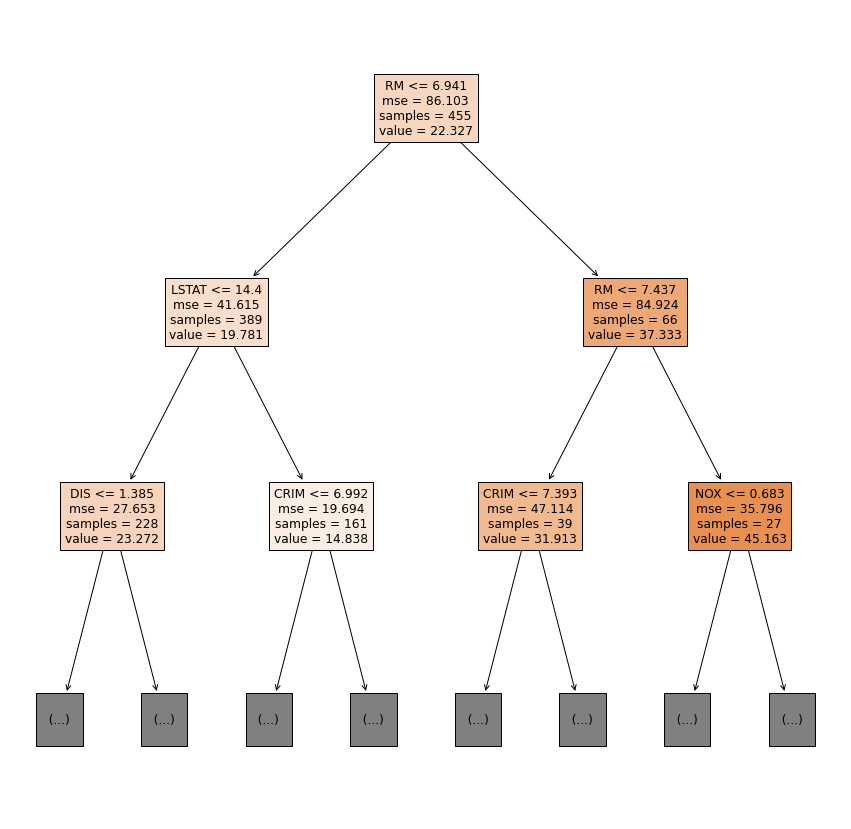

In [26]:
#這裡把決策樹畫出來
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15)) #用原始函式庫把畫布調大 , figure是圖
#用plot_tree畫樹 , filled是上色 ,其他是把欄位填進去
plot_tree(reg, 
          feature_names=boston["feature_names"],
          max_depth=2,
          filled=True)
#這裡放max_depth=2,是只畫出2層
#不放target 是因為我要的答案是一個數值,不像花是要分類指定的三個品種

In [27]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test) #對x_test做預測,可以看到裡面的數值和決策數底端的一樣,是模型做出分類的效果
r2_score(y_test, pre)

0.8309866781185038